##### Султонов Азамат, 303 группа

# Задача 5.3

Найти сигнал $\xi(t)$, являющийся суперпозицией конечного числа $N$
гармонических колебаний с эквидистантными частотами в полосе $\Delta \nu$. 
Определить и выразить через $\Delta \nu$ следующие величины: моменты времени, в
которых сигнал обращается в ноль и период следования импульсов. 
Определить длительность центрального лепестка импульса, как интервал
между соседними нолями, которому принадлежит максимум импульса. 
Найти относительную величину энергии, которая переносится центральным
лепестком импульса. Изобразить $\xi(t)$ в зависимости от переменной, 
пропорциональной $\Delta \nu$ для случая $\Delta \nu$ = 1 МГц при $N = 10$ и $100$.

## Решение

#### Начальные преобразования

Пусть аплитуды гармонических колебаний одинаковы и равны $а$, начало полосы частот --- $\nu1$.\
Перейдём к угловым частотам: $\omega_1 = 2\pi\nu_1, \Delta \omega = 2\pi\Delta\nu$.\
Тогда сигнал запишется в виде:
$$\xi(t) = a\sum_{n=0}^{N-1}\cos[(\omega_1 + n\delta\omega)t]$$
где $\delta\omega = \frac{\Delta\omega}{N-1}$.

Преобразуем выражение для $\xi(t)$:
$$\xi(t) = Re\sum_{n=0}^{N-1}ae^{i(\omega_1 + n\delta\omega)t} = a Re\ e^{i\omega_1t}\sum_{n=0}^{N-1}e^{i n\delta\omega t} = a Re\ e^{i\omega_1t}\frac{1-e^{iN\delta\omega t}}{1 - e^{i\delta\omega t}} = a Re\ \frac{\sin(N\delta\omega t/2)}{\sin(\delta\omega t/2)}e^{i[\omega_1+(N-1)\delta\omega/2]t}) = a\frac{\sin(N\delta\omega t/2)}{\sin(\delta\omega t/2)}\cos(\omega_0t) = a\frac{\sin\frac{N\Delta\omega t}{2(N-1)}}{\sin\frac{\Delta\omega t}{2(N-1)}}\cos(\omega_0t)$$
где $\omega_0 = \omega_1 + \Delta\omega/2$.

Так как на практике $N >> 1$, получаем:
$$
\xi(t) = aN\frac{\sin(\Delta\omega t/2)}{\Delta\omega t/2}\cos(\omega_0t)
$$

#### Нули сигнала и длительность центрального лепестка

Нули амплитуды сигнала являются нулями огибающей волнового 
пакета с основной частотой $\omega_0$. Т.е:
$$
\xi(t) = aN\frac{\sin(\Delta\omega t/2)}{\Delta\omega t/2} \Leftrightarrow \sin(\Delta\omega t/2) = 0 \Leftrightarrow \Delta \omega t/2 = \pi n, n \in \mathbb{Z}/\{0\}
.$$

Нули основной частоты:
$$
\cos(\omega_0 t) = 0 \Leftrightarrow \omega_0 t = \pi/2 + \pi n, n \in \mathbb{Z}
.$$

Максимум сигнала находится в точке $t = 0$, так как в этот момент все гармонические колебания достигают своей амплитуды.\
Как уже было показано ранее, через промежуток времени $\Delta t = 2\pi/\Delta\omega$ амлитуда сигнала впервые обращается в ноль. Этому времени равны период следования импульсов и длительность центрального лепестка.

#### Относительная энергия центрального лепестка

$$
\frac{W_0}{W} = \frac{\int_{-\Delta t}^{+\Delta t}|\xi(t)|^2dt}{\int_{-\infty}^{+\infty}|\xi(t)|^2dt}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from math import *

In [2]:
dnu = 1e6
dw = 2*pi*dnu
w_1 = 1e12
dt = 2*pi/dw
N = 100

def xi(t, N, w_1, dw, a=10):
    return a*sin(N*2*pi*1*t/(2*(N-1)))/sin(2*pi*1*t/(2*(N-1)))*cos((w_1 + dw/2)*t)

def xi_2(t):
    return xi(t, N, w_1, dw, a=10)**2
    

W_0 = integrate.quad(xi_2, -dt, +dt)
W = integrate.quad(xi_2, -np.inf, +np.inf)
print('Относительная энергия центрального лепестка = %.2f' % W_0/W)

Относительная энергия центрального лепестка = 0.81


#### Графики

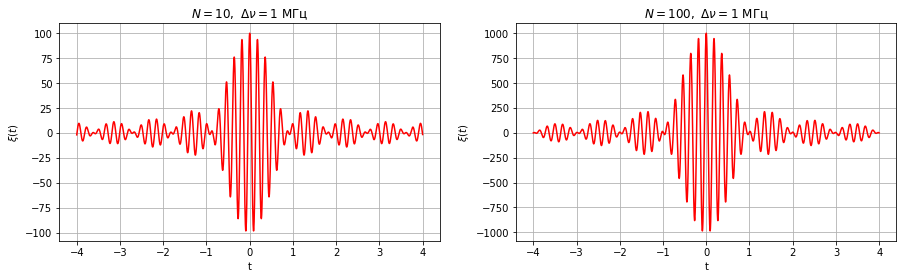

In [3]:
dnu = 1e6
w_1 = 35
dw = 2*pi*dnu

def xi(t, N, w_1, dw, a=10):
    return a*sin(N*2*pi*1*t/(2*(N-1)))/sin(2*pi*1*t/(2*(N-1)))*cos((w_1 + dw/2)*t)

t = np.arange(-4, 4, 0.001)
xi_10 = np.asarray([xi(t_, 10, w_1, dw) for t_ in t])
xi_100 = np.asarray([xi(t_, 100, w_1, dw) for t_ in t])

fig, ax = plt.subplots(1, 2, figsize=(15,4))
for i, N in enumerate([10, 100]):
    ax[i].grid()
    ax[i].set_title(r'$N = %d,\ \Delta \nu = 1$ МГц' % N)
    ax[i].set_xlabel('t')
    ax[i].set_ylabel(r'$\xi(t)$')
    ax[i].plot(t, eval('xi_%d'%N), color='red')

plt.show()